## Single Qubit gates

In [34]:
#!pip install qiskit
import qiskit as qk
from qiskit import IBMQ,Aer
from qiskit import *
from math import pi
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector

### 1.1 Pauli gates

$X\equiv \sigma_x = \left( \begin{array}{cc}
 0 & 1 \\
 1 & 0  
 \end{array}
 \right)  = |0\rangle\langle 1 | + |1\rangle\langle 0 |$ 
 
 $Z\equiv \sigma_z = \left( \begin{array}{cc}
 1 & 0 \\
 0 & -1  
 \end{array}
 \right)  = |0\rangle\langle 0 | - |1\rangle\langle 1 |$ 
 
 $Y\equiv \sigma_y = \left( \begin{array}{cc}
 0 & -i \\
 i & 0  
 \end{array}
 \right)  = i ( |1\rangle\langle 0 | - |0\rangle\langle 1 |)$ 

### 1.2 Hadamard gate

 $H =  (X+ Z)/\sqrt{2} = \frac{1}{\sqrt{2}}\left( \begin{array}{cc}
 1 & 1 \\
 1 & -1  
 \end{array}
 \right)  = \frac{ |0\rangle + | 1\rangle  } {\sqrt{2}} \langle 0 | + 
                    \frac{  |0\rangle - 1\rangle } {\sqrt{2}} \langle 1 |$ 

## Visualization 

### X gate

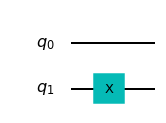

In [36]:
qc = qk.QuantumCircuit(2)
qc.x(1)
qc.draw('mpl')

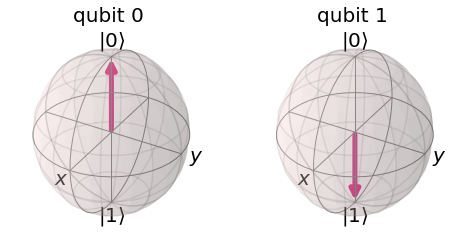

In [37]:
backend = Aer.get_backend('statevector_simulator')
out = qk.execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)


### Y gate

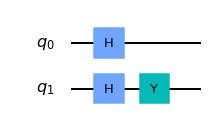

In [42]:
qc = qk.QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.y(1)
qc.draw('mpl')

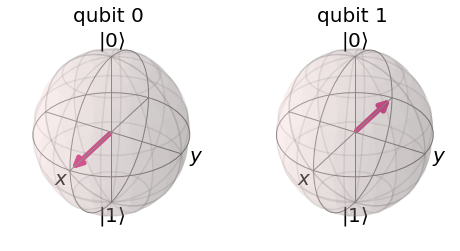

In [43]:
backend = Aer.get_backend('statevector_simulator')
out = qk.execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

### Z gate

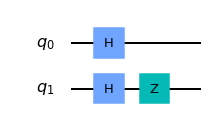

In [45]:
qc = qk.QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.z(1)
qc.draw('mpl')

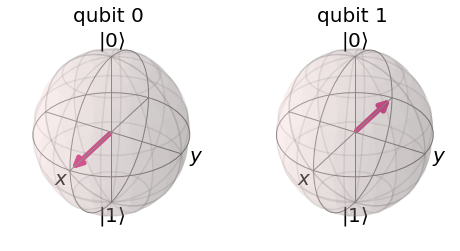

In [46]:
backend = Aer.get_backend('statevector_simulator')
out = qk.execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

 Excersise: how can we represent the Hadamard gate in terms of rotations ? 

$H =  (X+ Z)/\sqrt{2} = \frac{1}{\sqrt{2}}\left( \begin{array}{cc}
 1 & 1 \\
 1 & -1  
 \end{array}
 \right)  = ?$ 

Answer: $H = X (1+ X Z)/\sqrt{2} =  X (1 -i Y)/\sqrt{2} = X e^{-i \pi Y/4 } = i  e^{-i \pi X/2 } e^{-i \pi Y/4 }  $ 

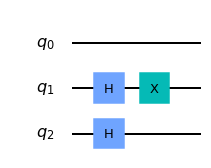

In [51]:
qc = qk.QuantumCircuit(3)
qc.h(1)
qc.x(1)
qc.h(2)
qc.draw('mpl')

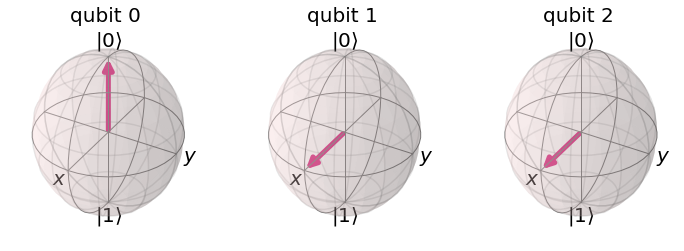

In [52]:
backend = Aer.get_backend('statevector_simulator')
out = qk.execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

Excersise: Calculate $HZH=?$

$H =  (X+ Z)/\sqrt{2} $ 

### 1.3 Measurement gate

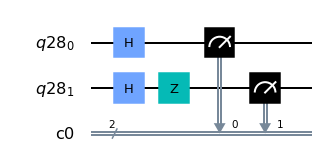

In [53]:
qr=qk.QuantumRegister(2)
cr=qk.ClassicalRegister(2)
qc=qk.QuantumCircuit(qr,cr)
qc.h(0)
qc.h(1)
qc.z(1)

measureZ=qk.QuantumCircuit(qr,cr)
measureZ.measure(qr,cr)
testZ=qc+measureZ
testZ.draw('mpl')

## Test of 1-Qubit gates

#### Qconfig_IBMQ_experience.py is file where you put the credentials in the form: 
#### APItoken = '' 
#### To get the token register at https://quantum-computing.ibm.com/account 

In [54]:
import Qconfig_IBMQ_experience
IBMQ.save_account(Qconfig_IBMQ_experience.APItoken, overwrite=True)
IBMQ.load_account()

C:\Users\Mike\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

####   Alternatively you can insert token directly:             

In [4]:
#IBMQ.enable_account("your token here")

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

#### See which backends are available

In [55]:
my_provider = IBMQ.get_provider()
my_provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

#### Choose the backend you like

#### Check which backend is less buisy

In [56]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

from qiskit.providers.ibmq import least_busy

small_devices = provider.backends(filters=lambda x: x.configuration().n_qubits == 5
                                   and not x.configuration().simulator)
least_busy(small_devices)

<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>

In [34]:
my_provider = IBMQ.get_provider()
#backend  = my_provider.get_backend('ibmq_ourense')
#backend  = my_provider.get_backend('ibmq_qasm_simulator')
backend=Aer.get_backend('qasm_simulator')

### Let's now write the code for simplest gates

#### Create 2 Qbits and 2 classical measurement gates

In [57]:
qr=qk.QuantumRegister(2)
cr=qk.ClassicalRegister(2)
qc=qk.QuantumCircuit(qr,cr)


### Prepare the state of  Qbits
#### Initially all Qbits are in |0> state


In [58]:
qc.x(qr[0])
#qc.x(qr[1])

#### Create measurement gates in computational basis

In [59]:
measureZ=qk.QuantumCircuit(qr,cr)
measureZ.measure(qr,cr)
testZ=qc+measureZ

#### Create measurement gates in superposition basis

In [60]:
measureX=qk.QuantumCircuit(qr,cr)
measureX.h(qr)
measureX.measure(qr,cr)
testX=qc+measureX

#### Run the jobs

Choose the local simulator

In [62]:
backend=Aer.get_backend('qasm_simulator')
jobIBM=qk.execute([testZ,testX],backend=backend,shots=1024)
resultSim=jobIBM.result()

Coose the cloud backend

In [61]:
backend  = my_provider.get_backend('ibmqx2')
jobIBM=qk.execute([testZ,testX],backend=backend,shots=1024)
resultExp=jobIBM.result()

#### Plot results as histograms

Computational basis

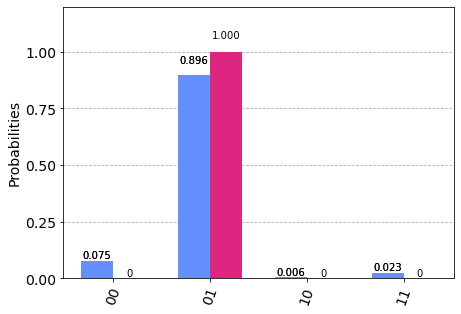

In [63]:
from qiskit.tools.visualization import plot_histogram
plot_histogram([resultExp.get_counts(testZ),resultSim.get_counts(testZ)]) 

Superposition basis

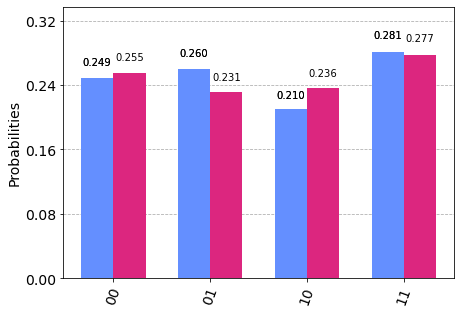

In [64]:
from qiskit.tools.visualization import plot_histogram
plot_histogram([resultExp.get_counts(testX),resultSim.get_counts(testX)]) 

####  Check what happens if we apply several times

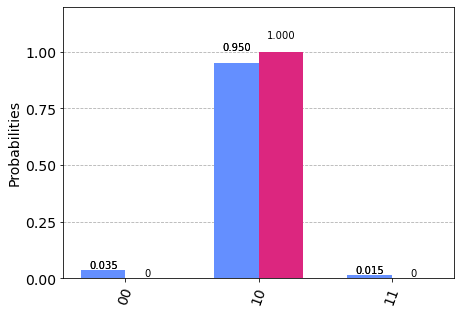

In [91]:
qr=qk.QuantumRegister(2)
cr=qk.ClassicalRegister(2)
qc=qk.QuantumCircuit(qr,cr)

qc.x(qr[0])
qc.x(qr[1])
qc.x(qr[0])
qc.x(qr[1])
qc.x(qr[0])
qc.x(qr[1])
qc.x(qr[0])
qc.x(qr[1])
qc.x(qr[0])
qc.x(qr[1])
qc.x(qr[0])

measureZ=qk.QuantumCircuit(qr,cr)
measureZ.measure(qr,cr)
testZ=qc+measureZ

#qc.x(qr[0])

backend  = my_provider.get_backend('ibmq_ourense')
jobIBM=qk.execute([testZ],backend=backend,shots=1024)
resultExpMulty=jobIBM.result()


backend=Aer.get_backend('qasm_simulator')
jobIBM=qk.execute([testZ],backend=backend,shots=1024)
resultSimMulty=jobIBM.result()

from qiskit.tools.visualization import plot_histogram
plot_histogram([resultExpMulty.get_counts(testZ),resultSimMulty.get_counts(testZ)]) 

###  Let's check CNOT gate
####  Let's choose Qbits 0 as controlling one and Qbit 1 as the target one. 

In [94]:
qr=qk.QuantumRegister(2)
cr=qk.ClassicalRegister(2)
qc=qk.QuantumCircuit(qr,cr)

qc.h(qr[0])
qc.cx(qr[0],qr[1])

measureZ=qk.QuantumCircuit(qr,cr)
measureZ.measure(qr,cr)
testZ=qc+measureZ

backend=Aer.get_backend('qasm_simulator')
jobIBM=qk.execute([testZ,testX],backend=backend,shots=1024)
resultSimCNOT=jobIBM.result()

backend  = my_provider.get_backend('ibmq_ourense')
jobIBM=qk.execute([testZ,testX],backend=backend,shots=1024)
resultExpCNOT=jobIBM.result()

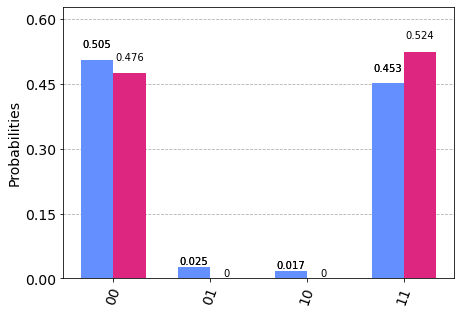

In [95]:
from qiskit.tools.visualization import plot_histogram
plot_histogram([resultExpCNOT.get_counts(testZ),resultSimCNOT.get_counts(testZ)])